# **Data Pre-Processing and Feature Analysis**

### **Context:**
 
 It is vital for the Cars4U business to have an accurate model to predict the prices of their used cars. They do not want to price their cars too high, otherwise customers will not buy them and their business will be low. On the flip side, they do not want their car prices to be too low, otherwise the business will lose potential money on a lot of their sales. Therefore, this model will accurately price used cars so that the business can sell them for the best price.
 

### **Objective:**
 
 The intended goal is to create a pricing model that can predict the price of a used car based on the features of the car, which can help the business sell used cars for the most ideal price for profitability.

### **Key Questions:**


Which features of the car contribute the most to the overall price of the car? In other words, what factors cause the price of the car to change the most?

Which factors in the dataset do not contribute to the change in used car price?


### **Problem Formulation**:

The prices of used cars change based on numerous different features in any of the given variables in the data set.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# **Dataset Setup** 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("used_cars.csv")

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:**

The S.No. column is the same as the index column.

The different fuel types observed from this little snippet of the data set are CNG, Diesel, and Petrol. 

Based on the data seen here, automatic transmission correlates to a higher price than manual transmission.

Some of the values for our target variable, Price, have null values, which eventually have to be taken care of.

A lot of the values for the New_price column are null, meaning that the new price of that certain car is not known.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Checking for missing values in each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**

A lot of the columns have datatype of type float, while the rest are either int type or object type. 

All of the float datatypes have some null values, while all the non-float datatypes do not have any null values.

Out of the 7253 total entries in the dataset, 6247 of them have a null value for New_price, meaning the price of the car if it was new is unknown.

1234 data entries have an null value for the Price column, which is our target variable.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [7]:
data.drop(columns = {'S.No.'}, inplace = True)

## **Exploratory Data Analysis**

In [8]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights:**

The Kilometers_Driven column seems pretty skewed based on the values of the mean, std, and the quartile values.

The minimum Mileage for this data set is 0, meaning there exists at least one car that has 0 KMPL for gas.

The mean of the Price column is significantly higher than the median value, and it is in fact closer to the 75th percentile value. The same goes for the New_price column.




In [9]:
data.select_dtypes(include = ['object']).describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights:**

There are 5 different Fuel Types within this dataset, and more than half of the cars have a Fuel Type of diesel.

Out of the 7253 cars in the dataset, 5204 of them are Manual transmission, while the rest are Automatic transmission.

A large majority of the cars in the dataset are First owned, with the most being Fourth owned.



**Check Kilometers_Driven extreme values**

In [11]:
# Sort in descending order of 'Kilometers_Driven'
data.sort_values(by = 'Kilometers_Driven', ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and we can remove this entry from data.

In [12]:
data.drop(2328, inplace = True)

**Check Mileage extreme values**

In [13]:
# Sort in ascending order of 'Mileage'
data.sort_values(by = 'Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**

## **1. Numerical Data**
## Histograms and Box Plots ##

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    
    feature: 1-d feature array or pandas Series
    figsize: size of fig (default (15, 10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)}, 
        figsize=figsize
    )

    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') 
    
    if bins:
        sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins, color='blue')
    else:
        sns.distplot(feature, kde=False, ax=ax_hist2, color='blue')
    
    plt.show()


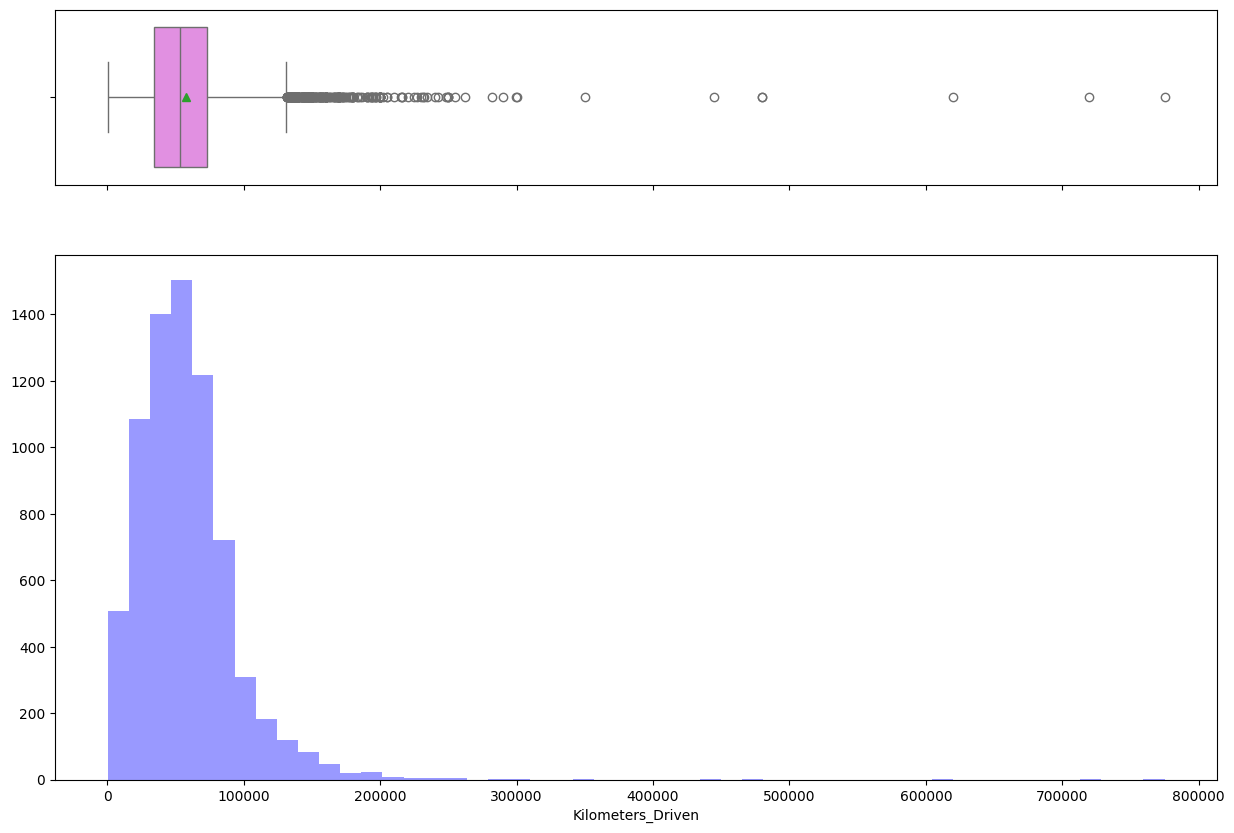

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

Kilometers_Driven is highly right-skewed. We can use Log transformation of the feature to reduce the skewness.

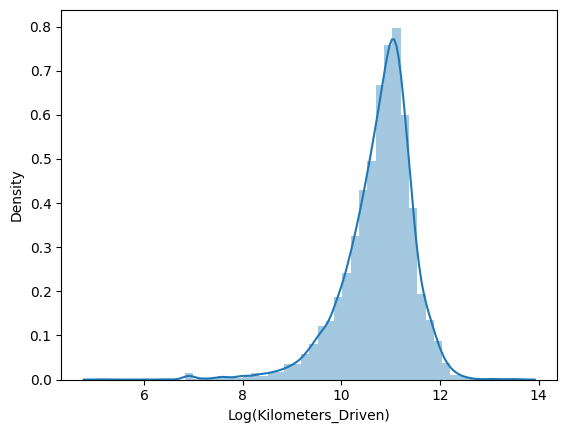

In [16]:
# Log transformation of 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**

The Log(Kilometers_Driven) histogram looks like it has an approximately Normal distribution, which is much better than the right-skewed graph it was before.

In [17]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

Like Kilometers_Driven, the distribution of Price is also highly skewed, so we can use log transformation on this column to help normalize the distribution. We will then add the transformed variable into the dataset as **'price_log'**.

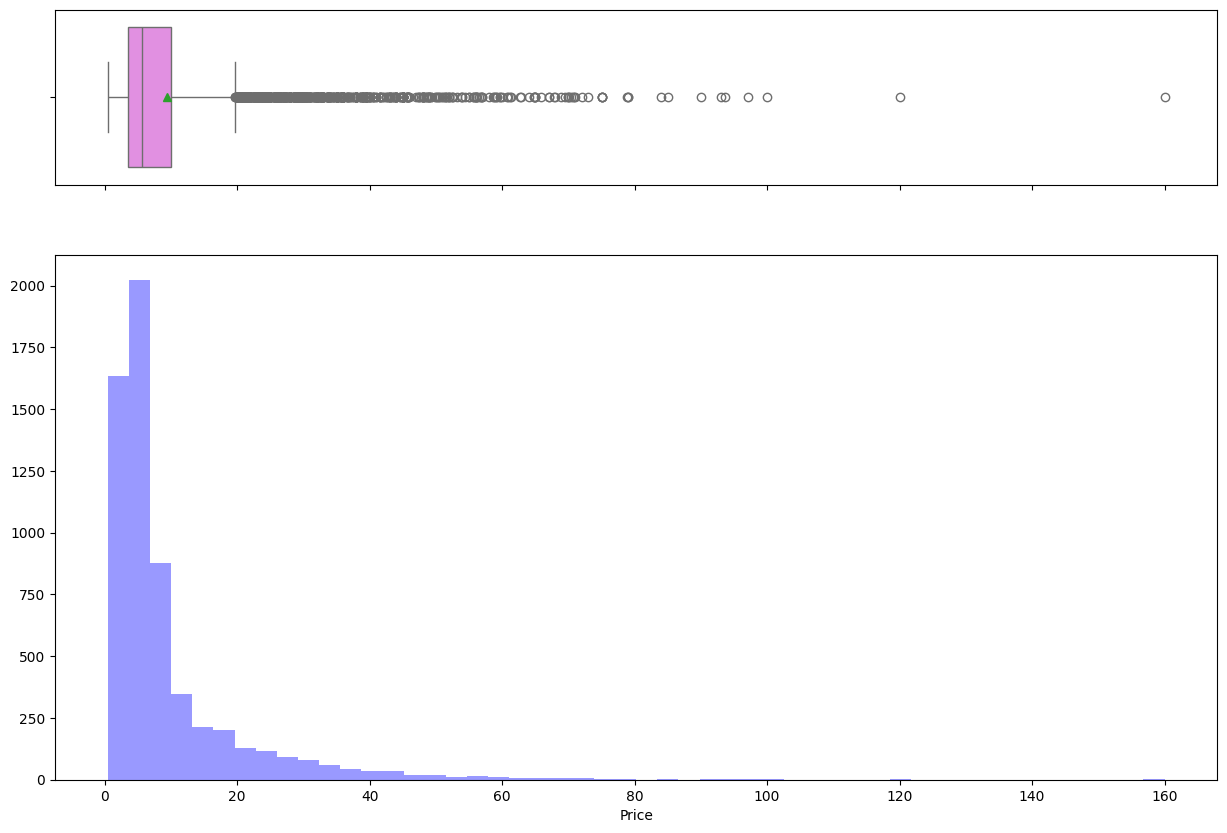

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

<Axes: xlabel='Log(Price)', ylabel='Density'>

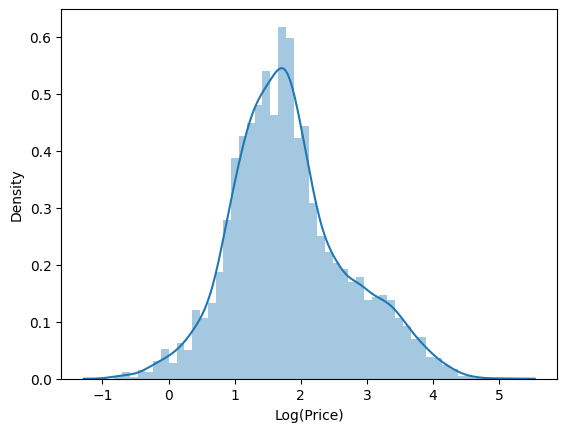

In [19]:
# Log transformation of 'Price'
sns.distplot(np.log(data['Price']), axlabel = "Log(Price)")

In [20]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

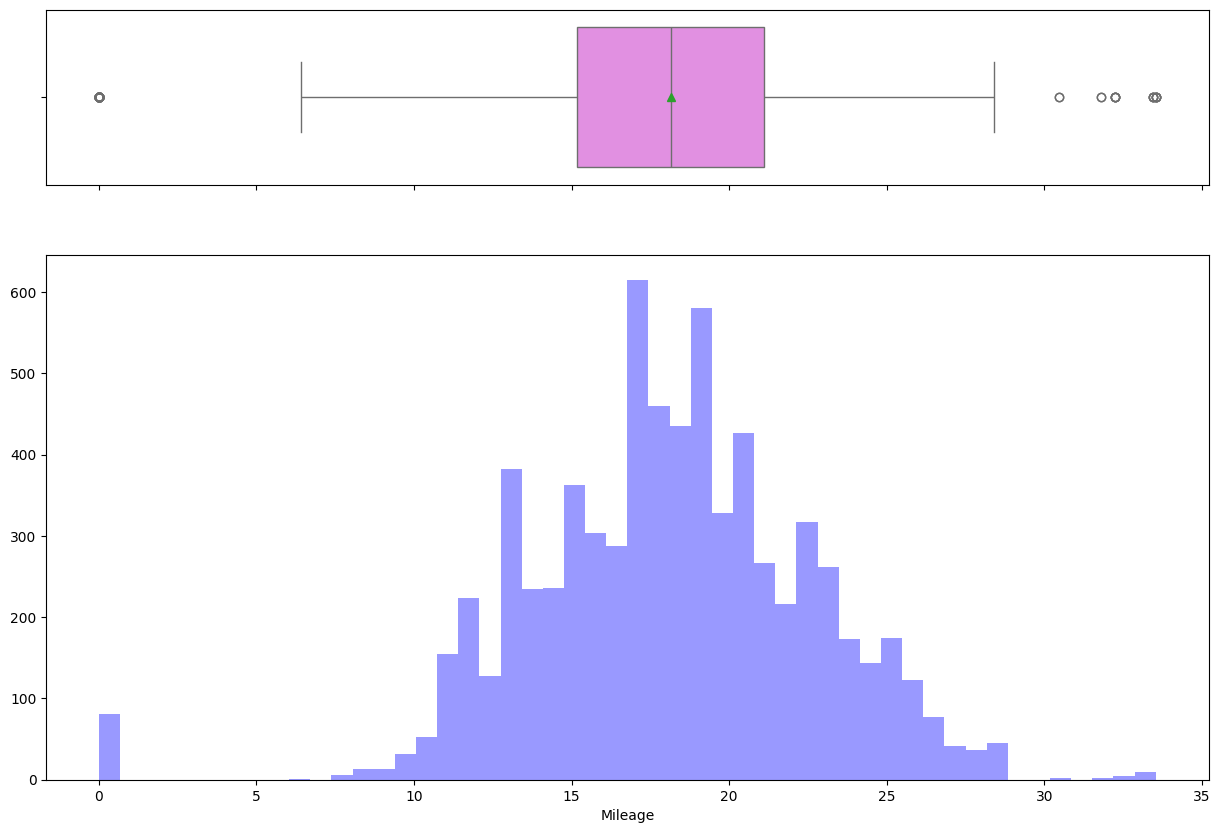

In [21]:
histogram_boxplot(data["Mileage"])

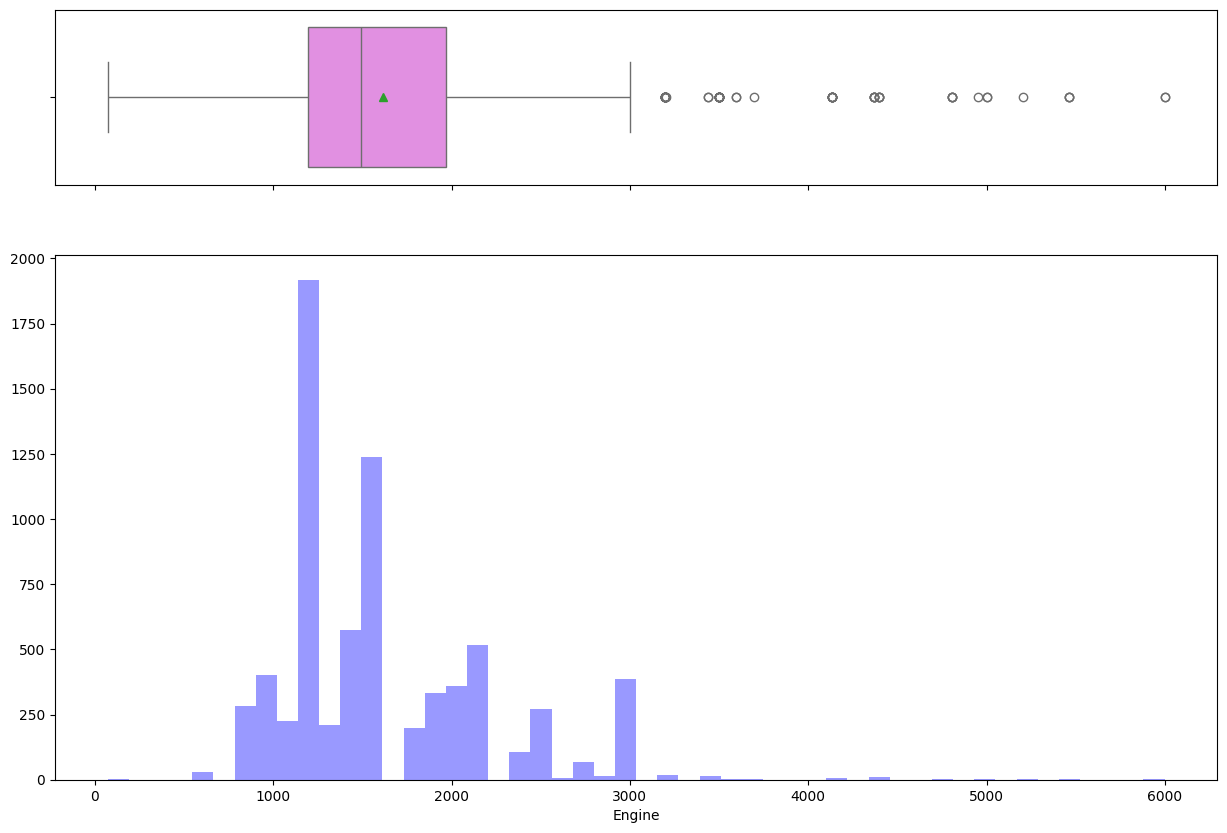

In [22]:
histogram_boxplot(data["Engine"])

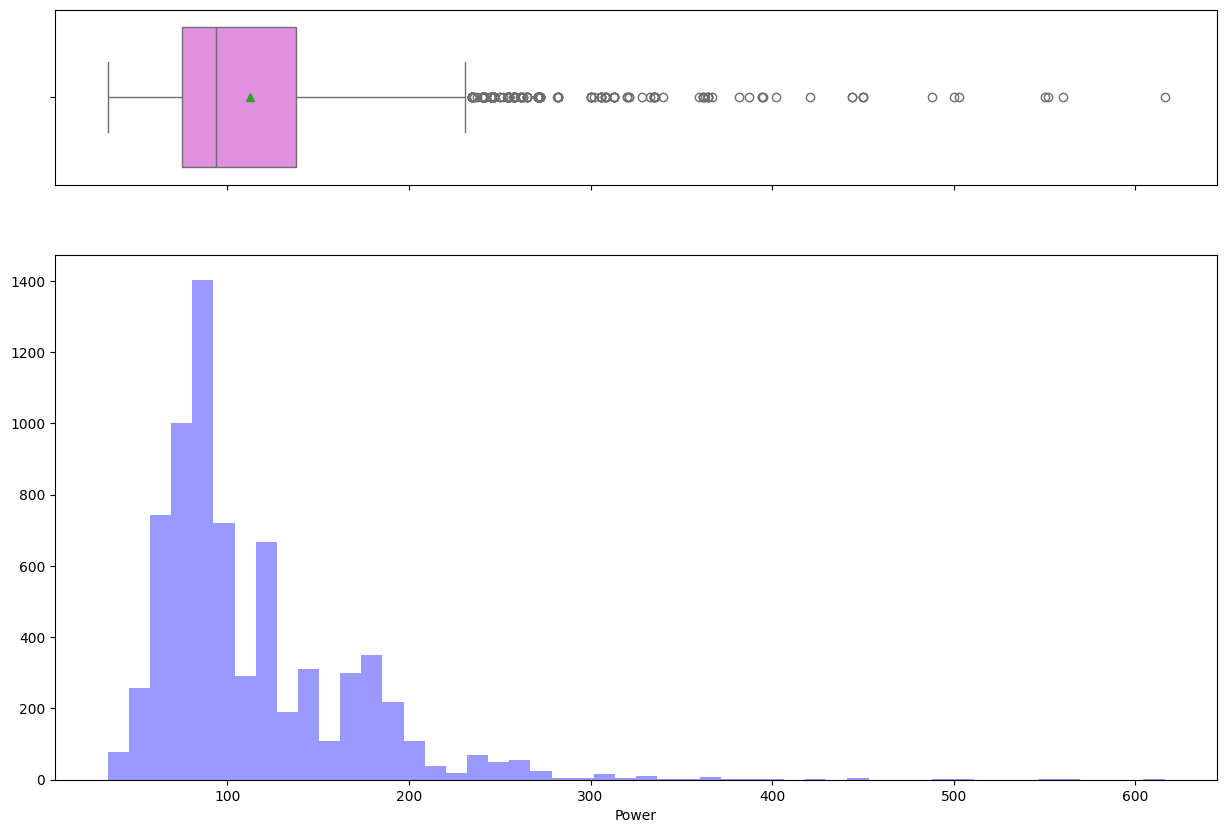

In [23]:
histogram_boxplot(data["Power"])

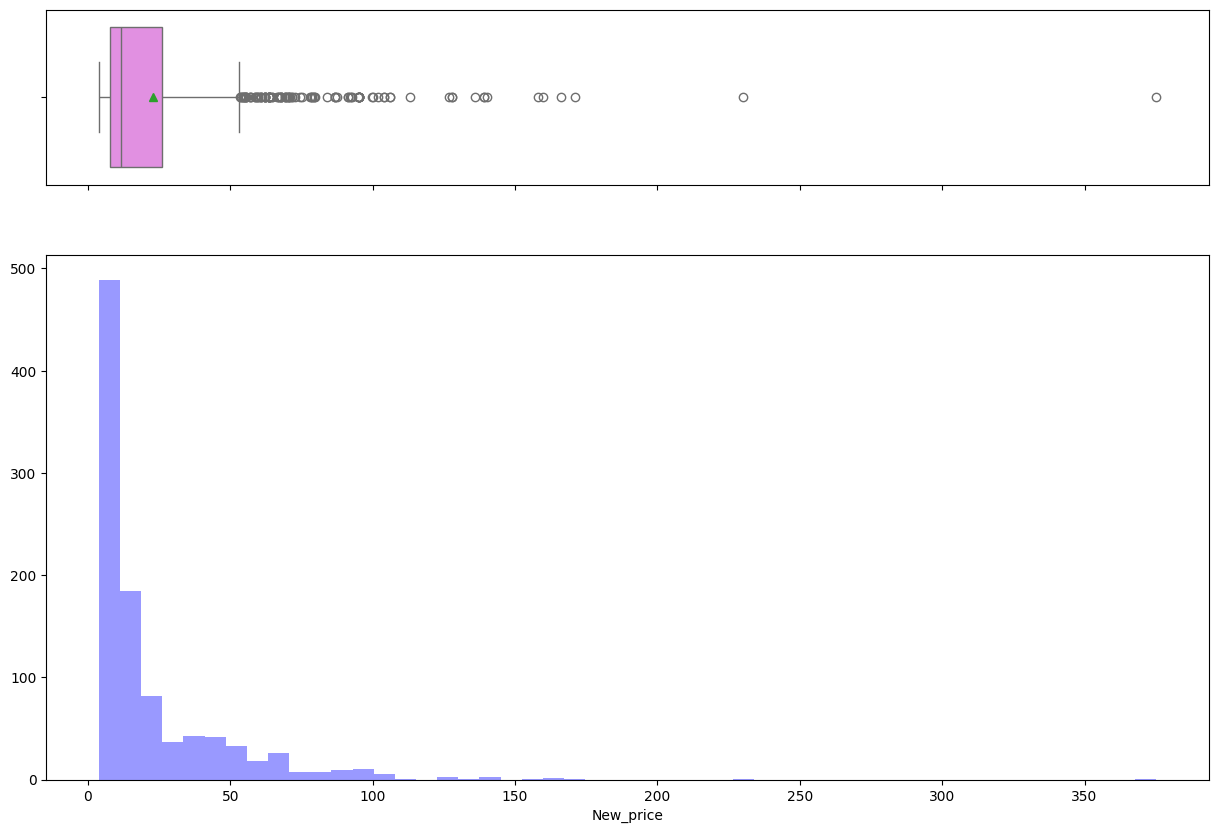

In [24]:
histogram_boxplot(data["New_price"])

The Mileage column has an approximate Normal distribution, and the Engine column also has a somewhat Normal distribution, but not as much as the Mileage column.

The Power and New_Price columns are both right-skewed.

## **2. Univariate analysis - Categorical Data**

In [25]:
def perc_on_bar(data, z):
    '''
    Plots a bar chart with percentages annotated on the bars.
    
    Parameters:
        data: DataFrame containing the data
        z: Column name (categorical feature)
    '''
    column_data = data[z].dropna()
    
    total = len(column_data)
    
    plt.figure(figsize=(15, 5))
    
    ax = sns.countplot(x=column_data, palette='Paired', order=column_data.value_counts().index)
    
    for p in ax.patches:
        height = p.get_height() 
        percentage = '{:.1f}%'.format(100 * height / total)  
        
        x = p.get_x() + p.get_width() / 2 
        y = height  
        
        ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12)
    
    plt.xlabel(z, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.title(f"Bar Plot for '{z}' with Percentages", fontsize=16)
    plt.show()

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

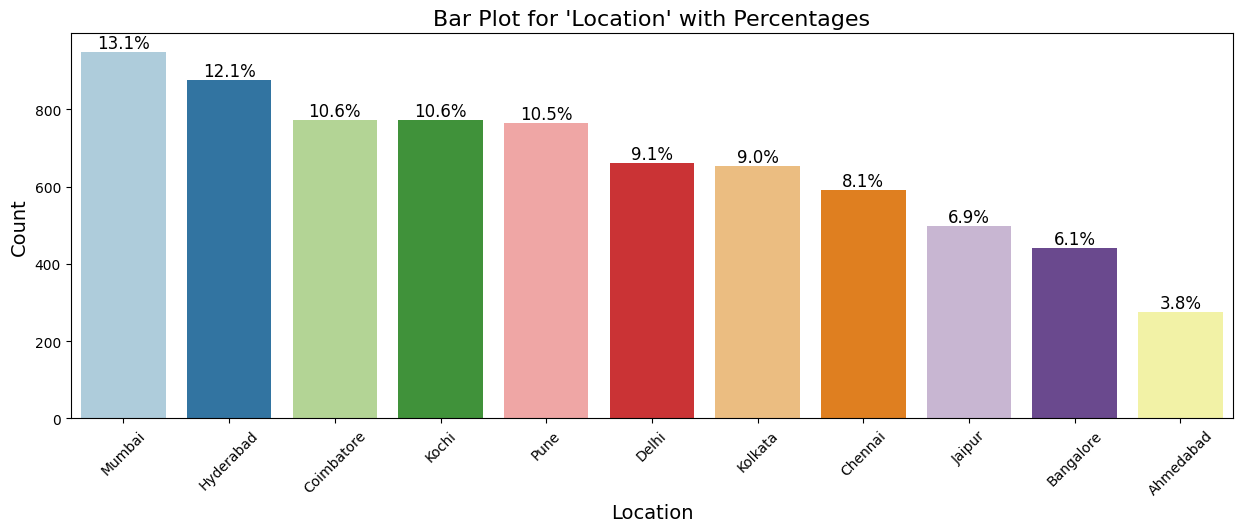

In [26]:
# Bar Plot for 'Location'
perc_on_bar(data, 'Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type.

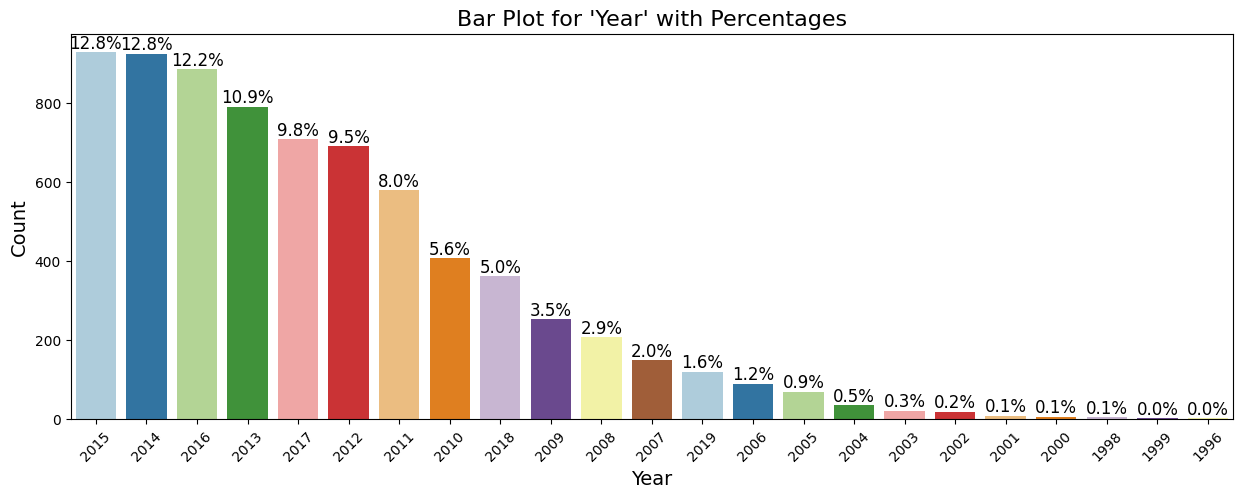

In [27]:
perc_on_bar(data, 'Year')

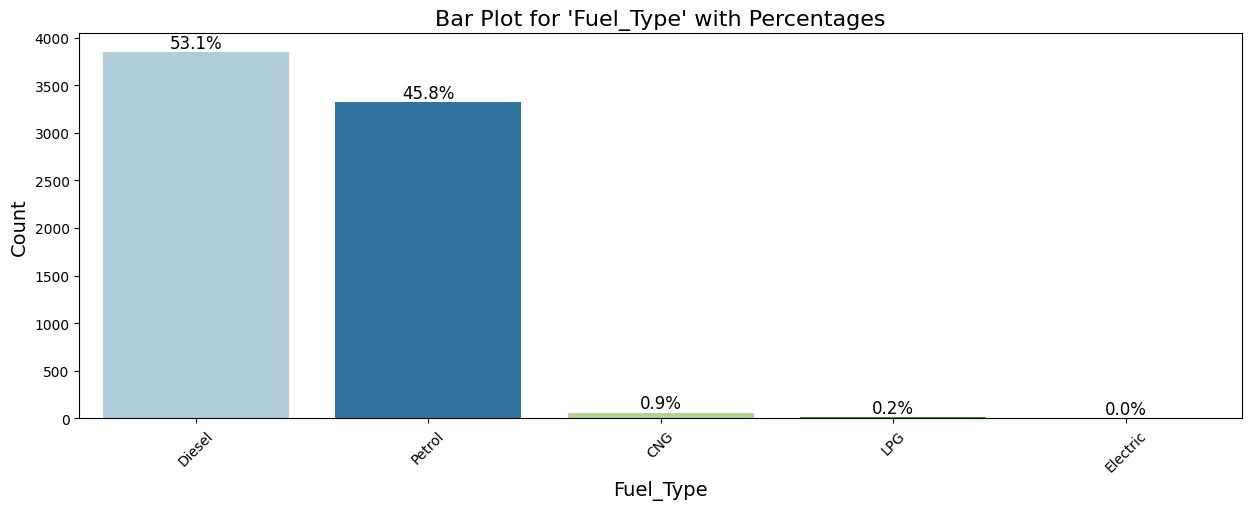

In [28]:
perc_on_bar(data, 'Fuel_Type')

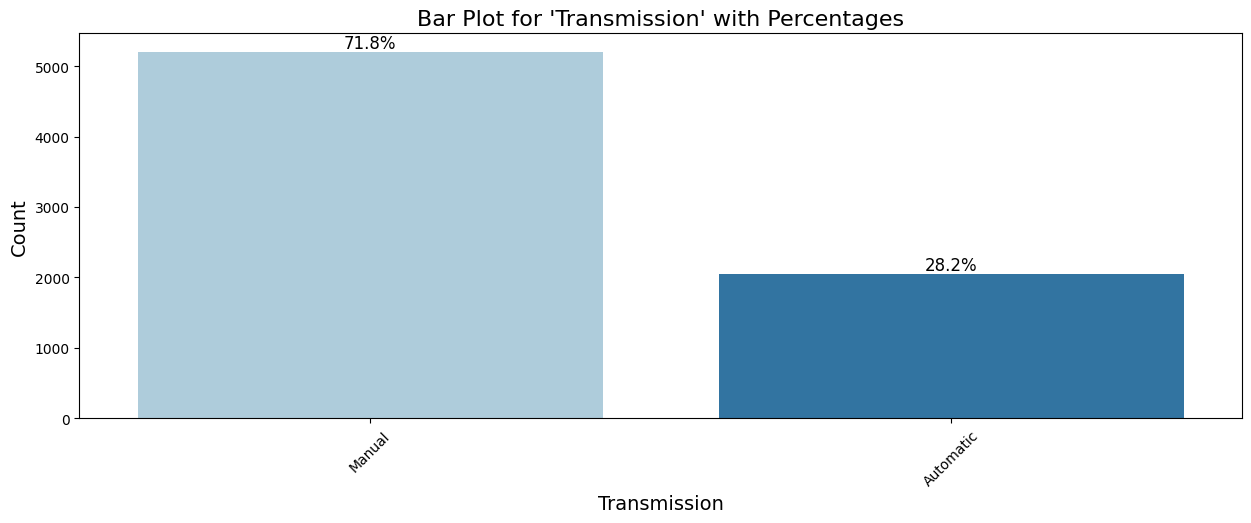

In [29]:
perc_on_bar(data, 'Transmission')

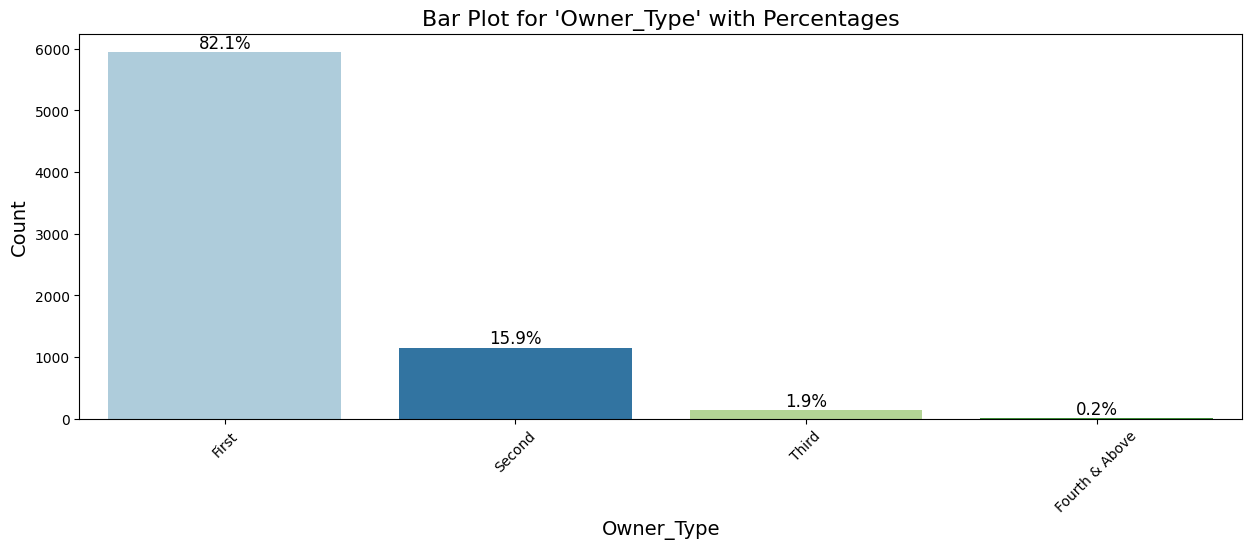

In [30]:
perc_on_bar(data, 'Owner_Type')

**Observations and Insights from all plots:**

About 25% of the cars from this dataset are from Mumbai or Hyderabad, which make up the two most common locations of manufactured cars in India.

Most of the cars are fairly newer, with a lot of them in the 2010s decade, whereas the previous years like the 1990s and 2000s have much less cars manufactured.

About 53% of cars have Diesel fuel type, while 46% have Petrol fuel type, and about 1% of the cars have either CNG, LPG, or Electric fuel type.

About 72% of cars have Manual transmission, whereas only 28% of cars have Automatic transmission.

An overwhelming 82% of cars are First owned, and 16% are Second owned, but only about 2% of cars are Third owned or higher.

## **Bivariate Analysis**

### **1. Scatter plot**

<Axes: xlabel='Year'>

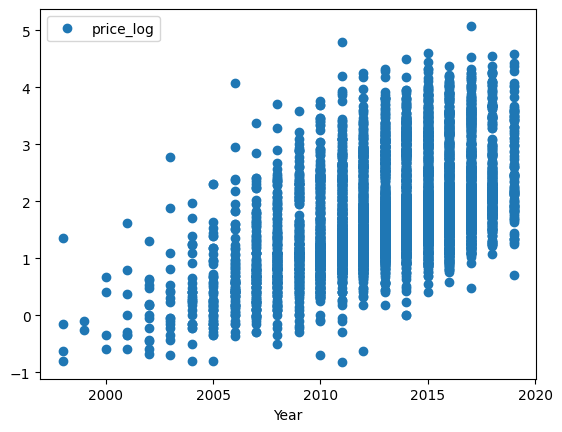

In [31]:
data.plot(x = 'Year', y = 'price_log', style = 'o')

<Axes: xlabel='kilometers_driven_log'>

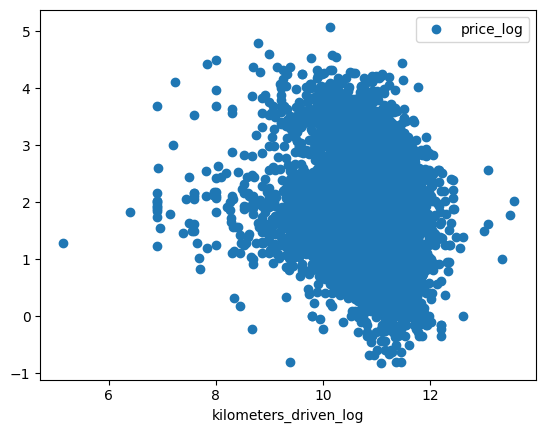

In [32]:
data.plot(x = 'kilometers_driven_log', y = 'price_log', style = 'o')

<Axes: xlabel='Mileage'>

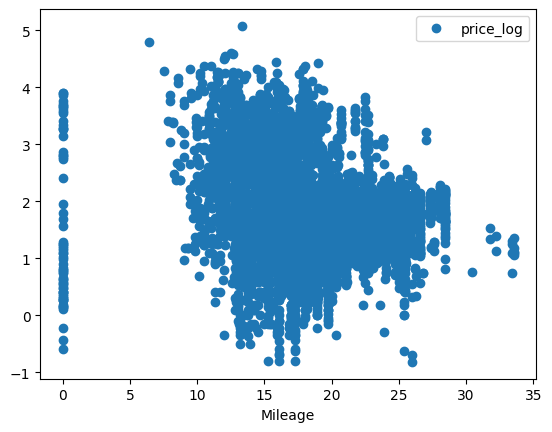

In [33]:
data.plot(x = 'Mileage', y = 'price_log', style = 'o')

<Axes: xlabel='Power'>

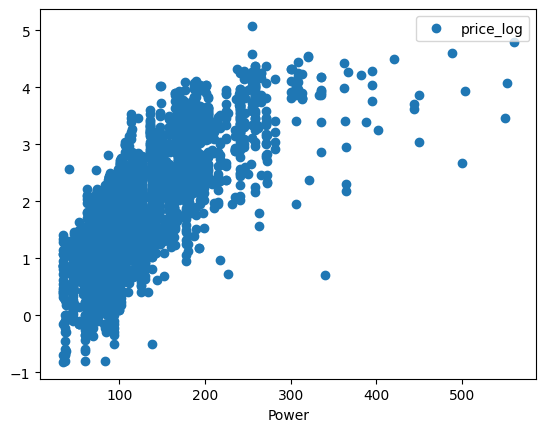

In [34]:
data.plot(x = 'Power', y = 'price_log', style = 'o')

<Axes: xlabel='Seats'>

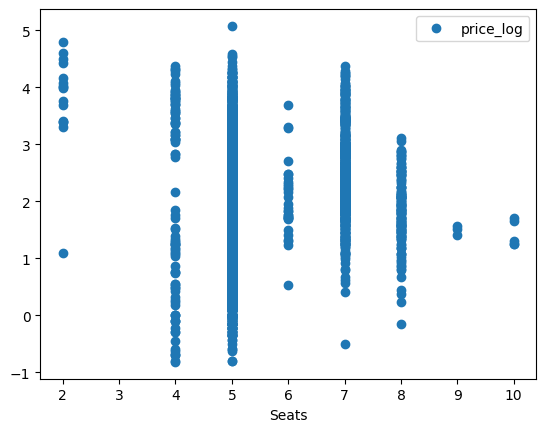

In [35]:
data.plot(x = 'Seats', y = 'price_log', style = 'o')

**Observations and Insights from all plots:**

As the Year that the car was manufactured increases, the log of the Price of the car also increases.

There seems to be no visible correlation between the log of the kilometers driven and the log of the Price. Also, there is no distinct correlation between the Mileage of a car and the log of the Price of the car. 

As the Power value of the car increases, the log of the Price tends to increase.

There is no direct relationship between the number of Seats in a car and the log of the Price.

### **2. Heat map**

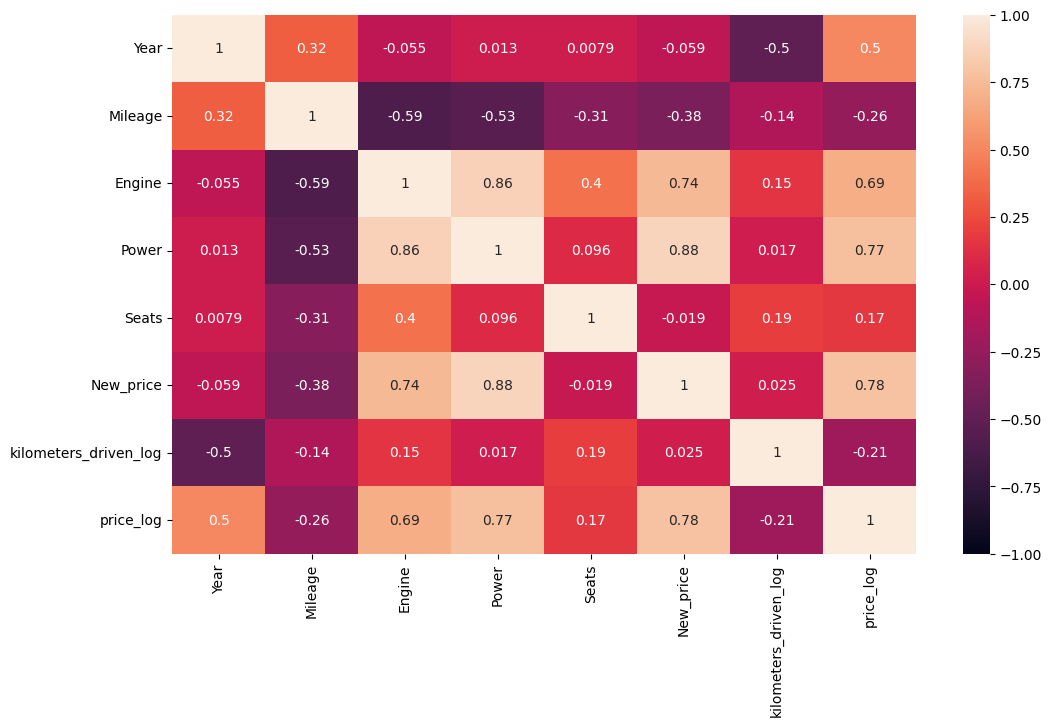

In [36]:
numeric_data = data.drop(['Price', 'Kilometers_Driven'], axis=1).select_dtypes(include=['number'])
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Observations and Insights:**

There is a strong negative correlation between Mileage and Engine values. This means as the displacement volume on the engine increases, the Mileage on the car decreases.

The strongest positive correlation is between the Power and New_price columns. This means as the power of the engine increases, the new price of the car also increases.

The whole kilometers_driven_log column is hardly correlated to any other variable, as most of the correlation values including that column are close to 0.

The two variables that negatively affect the price_log of the car are the kilometers_driven_log column and Mileage. This means as these two values increase, the price of the car tends to decrease.

The correlation between the Power and price_log is 0.78, meaning as the Power increases, the price of the car also drastically increases.

### **3. Box plot**

In [37]:
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) 
    
    sns.boxplot(x = z, y = data['Price'])
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False)
    
    plt.show()

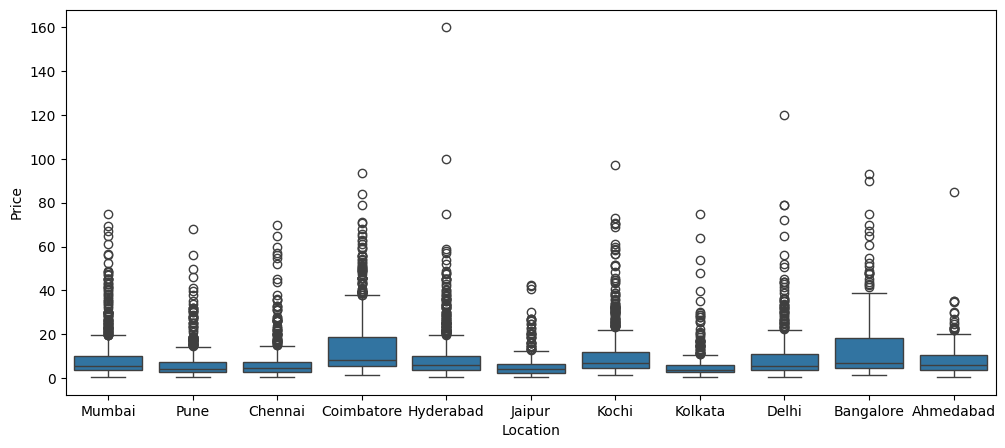

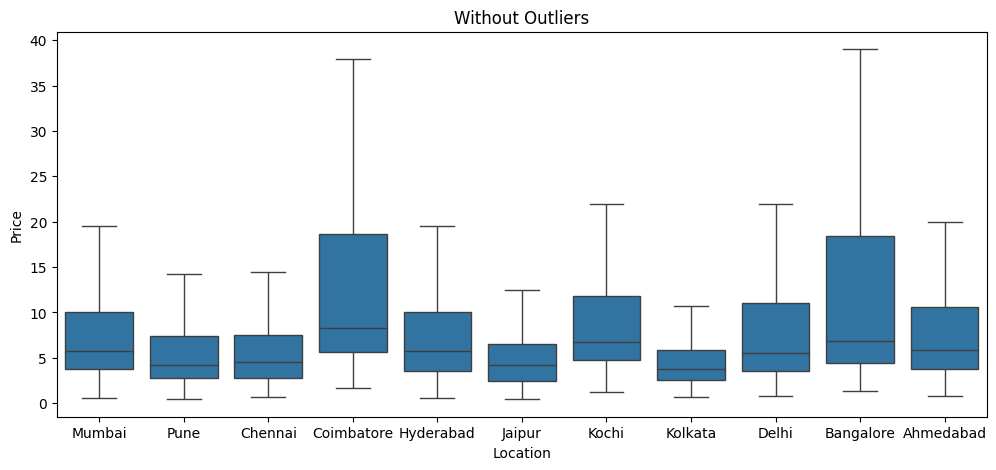

In [38]:
# Box Plot: Price vs Location
boxplot(data['Location'])

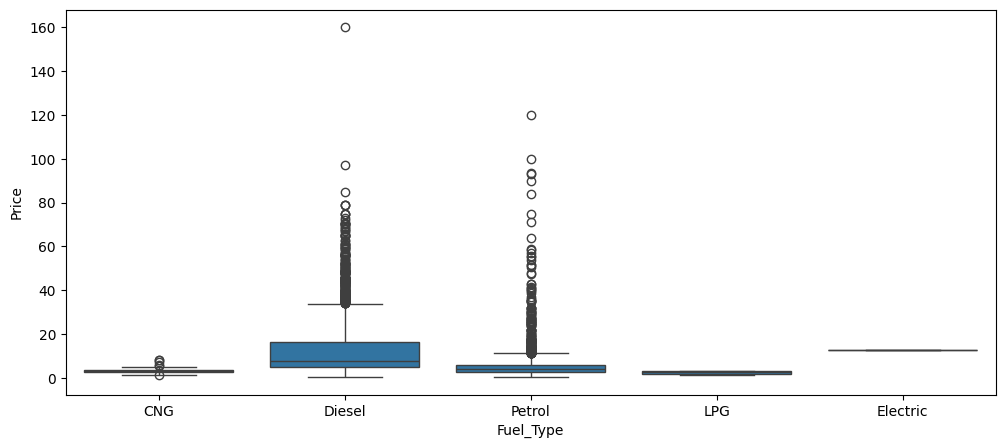

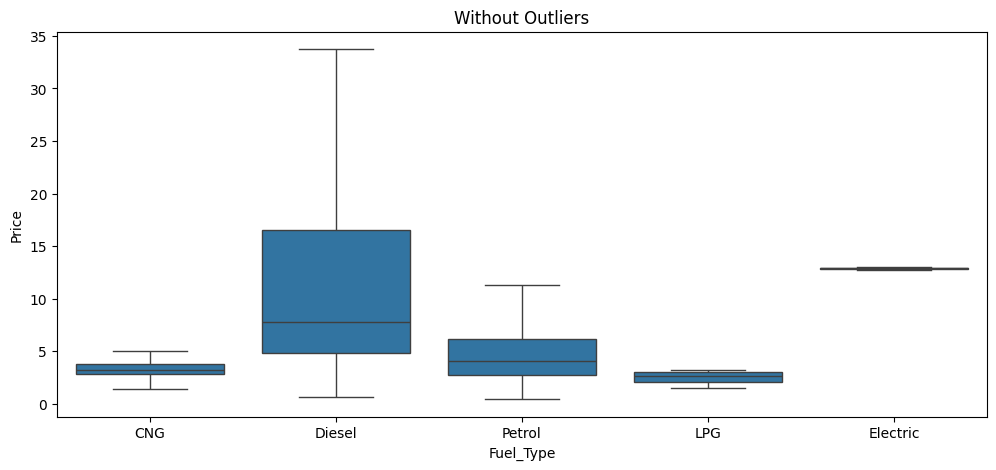

In [39]:
boxplot(data['Fuel_Type'])

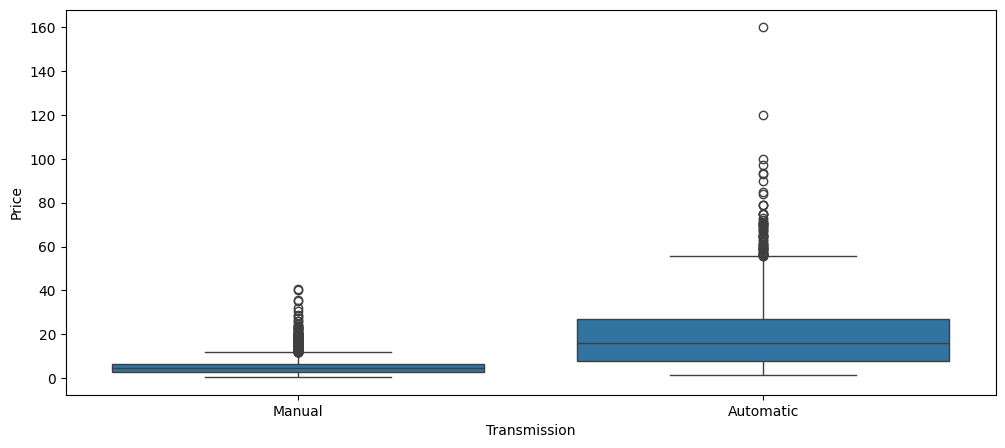

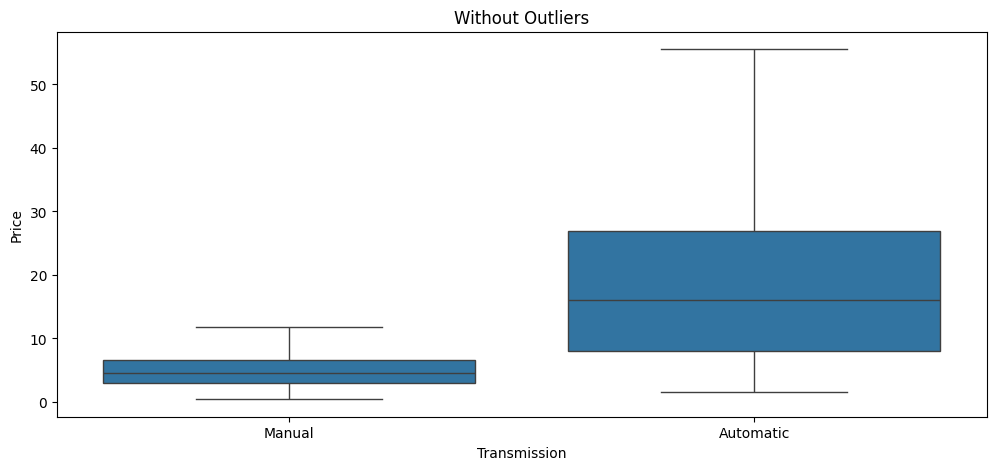

In [40]:
boxplot(data['Transmission'])

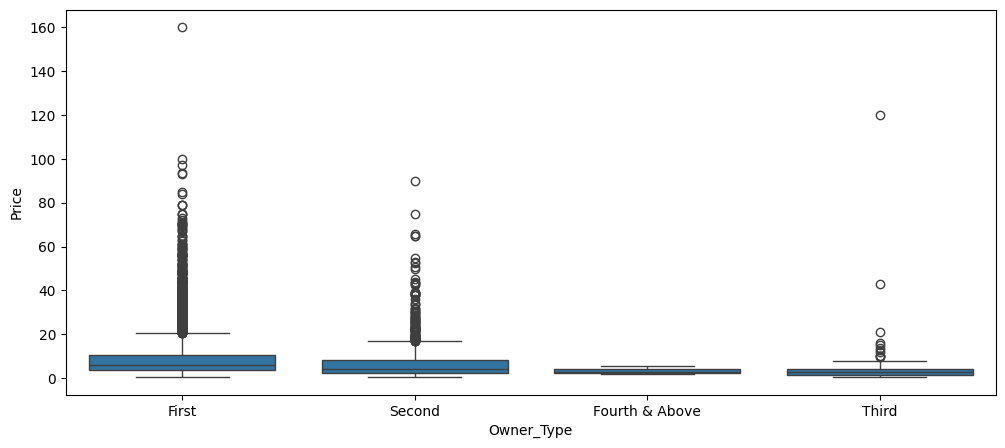

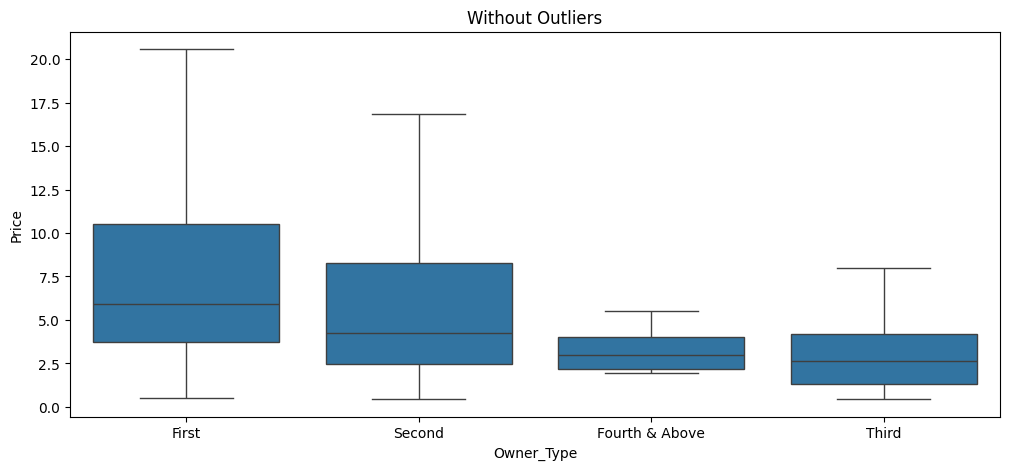

In [41]:
boxplot(data["Owner_Type"])

**Observations and Insights for all plots:**

The maximum price for a car from Coimbatore and Bangalore are significantly higher than the 75th percentile value. Also, the median values for both of these cities are much closer to Q1 than Q3, meaning more of the prices are on the lower end.

The price range for diesel cars range up until about 3,500,000 INR, while the prices for the other four types of fuels only goes up until about 1,500,000 INR.

The Q1, median, and Q3 values for Automatic transmission are all significantly higher than those of Manual transmission.

The boxplot data for First and Second owned cars look fairly similar, while the boxplots of Third and Fourth & Above look somewhat similar, with much lower prices.

### **Feature Engineering**

The `Name` column is not very useful in our analysis. Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. I will extract the Brand and Model from the Name column and create 2 new columns. 

In [42]:
data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1]

#### **Observations and Insights:**

From the Name column, we extract both the brand name of the car and the model. In all of the cars in the database, the first word of the Name is the car brand, so that information can be extracted and is vital in predicting the price. The second word of the Name column is the model name, so we extracted that as well.

### **Missing value treatment**

In [43]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights:**

There are a lot of missing values in the New_price column which need to be taken care of.

There are also a small amount of missing values in Mileage, Engine, Power, and Seats columns.

More significantly, there are 1234 missing values in the Price column, which is our target variable.

**Missing values in Seats**

In [44]:
data["Seats"].isnull().sum()

53

I will take the median number of seats for the particular car, using the Brand and Model name.


In [45]:
# Impute missing values in Seats
data['Seats'].fillna(data.groupby(['Brand', 'Model'])['Seats'].transform('median'), inplace = True)
data['Seats'].fillna(data['Seats'].median(), inplace = True)


In [46]:
# Total number of missing values of the Seats column should be 0
data["Seats"].isnull().sum()

0

**Missing values for Mileage**

In [47]:
data['Mileage'].isnull().sum()

2

In [48]:
# Impute missing Mileage
data['Mileage'].fillna(data.groupby(['Brand', 'Model'])['Mileage'].transform('median'), inplace = True)
data['Mileage'].fillna(data['Mileage'].median(), inplace = True)
data['Mileage'] = data['Mileage'].replace(0, data['Mileage'].median())


In [49]:
# Total number of missing values of the Mileage column should be 0
data['Mileage'].isnull().sum()

0

**Missing values for Engine**

In [50]:
data['Engine'].isnull().sum()

46

In [51]:
data['Engine'].fillna(data.groupby(['Brand', 'Model'])['Engine'].transform('median'), inplace = True)
data['Engine'].fillna(data['Engine'].median(), inplace = True)

In [52]:
data['Engine'].isnull().sum()

0

**Missing values for Power**

In [53]:
data['Power'].isnull().sum()

175

In [54]:
data['Power'].fillna(data.groupby(['Brand', 'Model'])['Power'].transform('median'), inplace = True)
data['Power'].fillna(data['Power'].median(), inplace = True)

In [55]:
data['Power'].isnull().sum()

0

**Missing values for New_price**

In [56]:
data['New_price'].isnull().sum()

6246

In [57]:
data['New_price'].fillna(data.groupby(['Brand', 'Model'])['New_price'].transform('median'), inplace = True)
data['New_price'].fillna(data['New_price'].median(), inplace = True)

In [58]:
data['New_price'].isnull().sum()

0

In [59]:
data['Price'].isnull().sum()

1234

In [60]:
data['Price'].fillna(data.groupby(['Brand', 'Model'])['Price'].transform('median'), inplace = True)
data['Price'].fillna(data['Price'].median(), inplace = True)

In [61]:
data['Price'].isnull().sum()

0

In [62]:
data['price_log'].isnull().sum()

1234

In [63]:
data['price_log'].fillna(data.groupby(['Brand', 'Model'])['price_log'].transform('median'), inplace = True)
data['price_log'].fillna(data['price_log'].median(), inplace = True)

In [64]:
data['price_log'].isnull().sum()

0

**Observations for missing values after imputing:**

For all of the columns in the data frame that had missing values, I replaced them with the median of the respective column. However, I made sure to gorup it by the brand name and model so it was more accurate.

For the Mileage column, since it is not possible for a car to have 0 mileage, I treated that as a missing value. So, I made sure to replace all the 0's in the column with the median as well.

In [65]:
# Save code as preprocessed data
df_cleaned = data.copy()
df_cleaned.to_csv("cars_data_updated.csv", index = False)